# 0. Librerias necesarias

# 1. Implementacion de Hash Table (Por Elmer)

Uno de los puntos importantes a considerar cuando se utilizan las tablas de 
hash, mencionado en dicha discusión teórica, es el manejo de colisiones.

Para esta práctica se 
tendrá que utilizar el método conocido como "encadenamiento separado", también explicado 
abajo, para el manejo de colisiones. Otro punto importante a considerar es la función de hash que 
se va a utilizar. Cuál es la más apropiada depende de las características de los datos que se van a 
almacenar en la tabla de hash.

In [1]:
import hashlib

In [2]:
class NodoHash:
    def __init__(self, dato = None, llave=None): 
        self.llave = llave
        self.dato = dato
        self.siguiente = None
        
    def __str__(self):
        return str(self.dato)
#    def getDato(self):
#        return self.dato
#    def setDato(self,nuevoDato):
#        self.dato = nuevoDato
#    def getSiguiente(self):
#        return self.siguiente
#    def setSiguiente(self,nuevoSig):
#        self.siguiente = nuevoSig
# No es necesario, en Python todo es global#        
class tabla_hash:
    """el constructor tiene 4 atributos:
    cont, que indica cuantos elementos hemos ingresado a la tabla 
        (Ojo, no significa cuantos espacios hay ocupados, ya que si la funcion hash tiene un problema, pudieramos tener muchos datos enlazados)
    factor_de_carga es el parametro que nos indica que tan llena va una tabla con relacion al numero de espacios disponibles
    
    tabla es donde se guardan los datos    
    
    """
    def __init__(self, tam=100):
        self.cont = 0
        self.tam = tam
        self.tabla = [None for i in range(0, self.tam)]
        

    def insertar(self, objeto, llave): #asumo que me daran un nodo objeto
        llave_hasheada = self.funcion_hash(llave)
        nuevo = NodoHash(objeto, llave)
        
        if(self.tabla[llave_hasheada] is None):
            self.tabla[llave_hasheada] = nuevo
            self.cont += 1
        #No es necesario checar el factor de carga en caso de que no haya colision
        #Si sirvio eficientemente, ¿Para que moverle?

        else: #colison
            nodo = self.tabla[llave_hasheada]
            anterior = None
            while(nodo is not None):
                anterior = nodo
                nodo = nodo.siguiente

            if(nodo is None): #hubo colision y llegamos a la ultima posicion
                anterior.siguiente = nuevo

            self.cont +=1
                            
                
    def busca(self,llave):
        llave_hasheada = self.funcion_hash(llave)
        
        nodo = self.tabla[llave_hasheada]
        
        while nodo is not None and nodo.llave != llave:
            #hay una coincidencia debido al hash, pero la llave del nodo (i.e. "TokyoJPN") no es la misma
            nodo = nodo.siguiente
            
        
        return nodo

    def borra(self, llave): 
        llave_hasheada = self.funcion_hash(llave)
        nodo = self.tabla[llave_hasheada]
        anterior = None
        
        while nodo is not None and nodo.llave != llave:
            anterior = nodo
            nodo = nodo.siguiente
            
            
        if nodo is None:
            return None
        else:
            self.tam -= 1
            res = nodo
            
            if anterior is None: #ie, elemento sin colision
                nodo = None
            else:
                anterior.siguiente = anterior.siguiente.siguiente
            
            return res

                
    def funcion_hash(self, dato):
        return int(hashlib.md5(str(dato).encode('utf-8')).hexdigest(), base=16) % self.tam
    
#tomo el dato, lo codifico a formato utf-8 para que pueda ser procesado por el metodo MD5
#despues hago ese en base hexadecimal, y ese numero hexadecimal lo convierto a base 10
#por ultimo, se usa la operacion modulo para asegurar que quepa en la tabla

#¿Por que tanto rollo y no usar la funcion hash() inherente a python?
#Porque no es deterministica, y eso nos puede traer muchos problemas

    
    def __iter__(self):
        return iter(self.tabla)
    
    def __getitem__(self, index):
        return self.busca(index)
        
    def __str__(self):
        cadena=""
        contador=0
        for elemento in self.tabla:
            contador += 1
            if(elemento is not None):
                cadena += (str(contador) + ":" +str(elemento.dato) + "\n")
                
                nodo_iterado = elemento.siguiente
                subcontador = 0
                while(nodo_iterado is not None):
                    subcontador += 1
                    cadena += ("\t" + str(contador) + "."+ str(subcontador) + ":" +str(nodo_iterado.dato) + "\n")
                    nodo_iterado = nodo_iterado.siguiente
        
        return str(cadena)
    def __repr__(self):
        representacion = str(self.tam)+" espacios \n" + str(self.cont) + " ocupados"
        return representacion
    

In [3]:
miTablita = tabla_hash(3)
miTablita.tam

miTablita.insertar("Ruben Robles Margueri", "Ruben")
miTablita.insertar("Elmer Adrian Ortega", "Elmer")
miTablita.insertar("Marcelino Sanchez", "Marcelino")
miTablita.insertar("Sebastian Ibarra", "Sebas")
miTablita.insertar("Adaya Isui Fortis", "Adaya")
miTablita.insertar("Fernanda Arelle", "Fer")
miTablita.insertar("Rafael Bautista", "Rafa")
miTablita.insertar("Isaac Jimenez", "Isaac")

In [4]:
print(miTablita)


1:Marcelino Sanchez
	1.1:Adaya Isui Fortis
	1.2:Isaac Jimenez
2:Sebastian Ibarra
	2.1:Rafael Bautista
3:Ruben Robles Margueri
	3.1:Elmer Adrian Ortega
	3.2:Fernanda Arelle



In [5]:
miTablita["Fer"]

# 2. Instrucciones

Después de tener implementadas las tablas de hash se debe diseñar y realizar una serie de experimentos 
que permita medir tiempos de ejecución (y cualquier 
otro parámetro relevante) para: 
    
    (a) obtener un entendimiento detallado del funcionamiento de las tablas de hash bajo la estrategia de encadenamiento separado para el manejo de colisiones, y 
    
    (b) comparar las implementaciones en Python y Java entre sí. 

Algunos parámetros que deben variar (deben estar contemplados dentro del diseño de la serie de experimentos) 
para obtener suficientes datos para poder llegar a conclusiones generales son: 

    (a) la cantidad de datos con los que se alimente la tabla de hash, n, en relación con el tamaño de la misma, m (n mucho mayor a m vs. n aproximadamente igual a m vs. n mucho menor que m), 
    (b) el tipo de operación a realizar sobre la tabla de hash (inserción de datos vs. búsqueda de datos vs. eliminación de datos), y 
    (c) cualquier otro que se les ocurra que permita explorar algún aspecto de las tablas de hash y/o el método de encadenamiento separado para el manejo de colisiones. 

Dado que las tablas de hash están diseñadas para almacenar grandes cantidades de información tal que el acceso a dicha 
información sea eficiente, busquen en Internet para ver si encuentran alguna fuente de grandes 
cantidades de datos os experimentos 

# 3. Implementacion de la clase lectora del CSV 

In [6]:
import pandas as pd

In [7]:
class Ciudad:
    def __init__(self, nombre = "", pais = "", poblacion="", codigo_pais=""): 
        self.nombre = str(nombre)
        self.pais = str(pais)
        self.poblacion = str(poblacion)
        self.codigo_pais = str(codigo_pais)
        
    def __str__(self):
        cadena = str(self.nombre + ", " + self.codigo_pais)
        return cadena
    
    def __repr__(self):
        return (self.nombre + ", " + self.codigo_pais)

In [38]:
class Tabla_de_ciudades:
    def __init__(self, ubicacion_archivo="worldcities.csv", numero_de_espacios=41001): 
        self.ubicacion_archivo = ubicacion_archivo
        self.tabla_de_datos = tabla_hash(numero_de_espacios)
        self.construccion()

    def construccion(self):
        archivo = pd.read_csv(self.ubicacion_archivo)
        lista_con_datos = archivo.values.tolist()#como lo pase de dataframe a lista, no tengo que quitarle la primera linea
        
        for elemento in lista_con_datos:
            ciudad = Ciudad(nombre=elemento[1], pais=elemento[4], poblacion=elemento[9], codigo_pais=elemento[6])
            llave_a_hashear = str(ciudad.nombre)+str(ciudad.codigo_pais)
            self.tabla_de_datos.insertar(ciudad, llave_a_hashear)
    
    def borra(self, llave):
        return self.tabla_de_datos.borra(llave)
    
    def __repr__(self):
        return repr(self.tabla_de_datos)
    
    def __iter__(self):
        return iter(self.tabla_de_datos)
    
    def __str__(self):
        return str(self.tabla_de_datos)
    
    def __getitem__(self, index):
        return self.tabla_de_datos.busca(index)
    
    def __len__(self):
        return self.tabla_de_datos.tam



In [39]:
mis_ciudades = Tabla_de_ciudades()

In [40]:
print(repr(mis_ciudades))

41001 espacios 
41001 ocupados


In [41]:
print(mis_ciudades)

1:West Derby, GBR
	1.1:Monsenhor Hipolito, BRA
3:Impruneta, ITA
4:Schijndel, NLD
5:Gorom-Gorom, BFA
6:Vancouver, USA
	6.1:Barbosa, COL
	6.2:Barbosa, COL
7:Querqueville, FRA
8:Monte Aprazivel, BRA
	8.1:Hammonton, USA
	8.2:Somerdale, USA
9:Zhailuo, CHN
	9.1:Charles Town, USA
	9.2:Geisenhausen, DEU
10:Sudley, USA
	10.1:Itajuba, BRA
11:Sariaya, PHL
13:Shancheng, CHN
14:Hayesville, USA
	14.1:Cha Preta, BRA
	14.2:Birmensdorf, CHE
16:Sydney, AUS
	16.1:Eschau, FRA
18:Cakovec, HRV
	18.1:Marksville, USA
20:Kampala, UGA
	20.1:Murzuq, LBY
	20.2:Levice, SVK
	20.3:Kulunda, RUS
	20.4:Ofterdingen, DEU
21:Escaudain, FRA
22:Croydon, USA
25:Turtkul, UZB
26:Gandino, ITA
28:Samobor, HRV
	28.1:Perez, PHL
	28.2:Mrkonjic Grad, BIH
29:Stafford, GBR
	29.1:Lege-Cap-Ferret, FRA
	29.2:Vitkov, CZE
33:Palmeira dos Indios, BRA
	33.1:Sao Goncalo do Sapucai, BRA
	33.2:Laives, ITA
34:Jazan, SAU
36:Yuza, JPN
37:Nizamabad, IND
	37.1:Passo do Sobrado, BRA
38:Roseau, DMA
40:Coxhoe, GBR
42:Taiuva, BRA
43:Sanger, USA
	43.1:Sa

In [42]:
print(mis_ciudades["Ciudad ObregonMEX"])

Ciudad Obregon, MEX


In [43]:
mis_ciudades["Ciudad ObregonMEX"]

# 4. Experimentos 

- 20 veces c/u y obtener el promedio

In [44]:
import time
import random

## Insercion
- 10 mil 
- 20 mil
- 30 mil
- Numero exacto de datos
- 100 mil

In [53]:
tiempos_insercion_10mil = []
for i in range(0, 20):
    start_time = time.time()
    mis_ciudades10 = Tabla_de_ciudades(numero_de_espacios=10000)    
    end_time = time.time()
    duracion_ms = (end_time - start_time)
    tiempos_insercion_10mil.append(duracion_ms)    
    
tiempos_insercion_20mil = []
for i in range(0, 20):
    start_time = time.time()
    mis_ciudades20 = Tabla_de_ciudades(numero_de_espacios=20000)    
    end_time = time.time()
    duracion_ms = (end_time - start_time)
    tiempos_insercion_20mil.append(duracion_ms)        
    
tiempos_insercion_30mil = []
for i in range(0, 20):
    start_time = time.time()
    mis_ciudades30 = Tabla_de_ciudades(numero_de_espacios=30000)    
    end_time = time.time()
    duracion_ms = (end_time - start_time)
    tiempos_insercion_30mil.append(duracion_ms)        

tiempos_insercion_exacto = []
for i in range(0, 20):
    start_time = time.time()
    mis_ciudades40 = Tabla_de_ciudades(numero_de_espacios=41001)    
    end_time = time.time()
    duracion_ms = (end_time - start_time)
    tiempos_insercion_exacto.append(duracion_ms)        

tiempos_insercion_100mil = []
for i in range(0, 20):
    start_time = time.time()
    mis_ciudades100 = Tabla_de_ciudades(numero_de_espacios=100000)    
    end_time = time.time()
    duracion_ms = (end_time - start_time)
    tiempos_insercion_100mil.append(duracion_ms)        

## Busqueda
- 10 mil 
- 20 mil
- 30 mil
- Numero exacto de datos
- 100 mil

In [54]:
print(time.time())
mis_ciudades10["HermosilloMEX"]
print(time.time())


print(time.time())
mis_ciudades10["NogalesMEX"]
print(time.time())


print(time.time())
mis_ciudades10["San DiegoUSA"]
print(time.time())

print(time.time())
mis_ciudades10["Los AngelesUSA"]
print(time.time())

1637872405.1156998
1637872405.1156998
1637872405.1156998
1637872405.1156998
1637872405.1156998
1637872405.1166975
1637872405.1166975
1637872405.1166975


In [47]:
#uso este para que la computadora no se quede con la memoria interna de que visito la tabla de ciudades
mis_ciudades_otro = pd.read_csv("worldcities.csv")
mis_ciudades_otro = mis_ciudades_otro.values.tolist()
llaves_a_buscar = []
for elemento in mis_ciudades_otro:
    llave = str(elemento[1])+str(elemento[6])
    llaves_a_buscar.append(llave)   

In [64]:
tiempos_busqueda_10mil = []
cont=0

while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
        llave_a_buscar = random.choice(llaves_a_buscar)
        mis_ciudades10[llave_a_buscar]
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_busqueda_10mil.append(duracion_ms)
    cont += 1

tiempos_busqueda_20mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
        llave_a_buscar = random.choice(llaves_a_buscar)
        mis_ciudades20[llave_a_buscar]
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_busqueda_20mil.append(duracion_ms)
    cont += 1

tiempos_busqueda_30mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
        llave_a_buscar = random.choice(llaves_a_buscar)
        mis_ciudades30[llave_a_buscar]
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_busqueda_30mil.append(duracion_ms)
    cont += 1

tiempos_busqueda_40mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
        llave_a_buscar = random.choice(llaves_a_buscar)
        mis_ciudades40[llave_a_buscar]
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_busqueda_40mil.append(duracion_ms)
    cont += 1
    
tiempos_busqueda_100mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
        llave_a_buscar = random.choice(llaves_a_buscar)
        mis_ciudades100[llave_a_buscar]
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_busqueda_100mil.append(duracion_ms)
    cont += 1

In [56]:
print(tiempos_busqueda_10mil) 

[4.99755859375, 5.998291015625, 5.99755859375, 5.00830078125, 4.983642578125, 6.010986328125, 3.99755859375, 4.997314453125, 4.997314453125, 4.98486328125, 4.996337890625, 5.01123046875, 4.98681640625, 5.007568359375, 4.99755859375, 4.9970703125, 4.983642578125, 5.01123046875, 4.984619140625, 5.01025390625, 3.998046875]


## Eliminacion
- 10 mil 
- 20 mil
- 30 mil
- Numero exacto de datos
- 100 mil

In [58]:
tiempos_eliminacion_10mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
            llave_a_buscar = random.choice(llaves_a_buscar)
            mis_ciudades10.borra(llave_a_buscar)
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_eliminacion_10mil.append(duracion_ms)
    cont += 1
    
tiempos_eliminacion_20mil = []
cont=0
while cont<=20:   
    start_time = time.time()*1000
    for i in range(0,1000):
            llave_a_buscar = random.choice(llaves_a_buscar)
            mis_ciudades20.borra(llave_a_buscar)
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_eliminacion_20mil.append(duracion_ms)
    cont += 1
    
tiempos_eliminacion_30mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
            llave_a_buscar = random.choice(llaves_a_buscar)
            mis_ciudades30.borra(llave_a_buscar)
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_eliminacion_30mil.append(duracion_ms)
    cont += 1

tiempos_eliminacion_40mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
            llave_a_buscar = random.choice(llaves_a_buscar)
            mis_ciudades40.borra(llave_a_buscar)
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_eliminacion_40mil.append(duracion_ms)
    cont += 1
    
tiempos_eliminacion_100mil = []
cont=0
while cont<=20:
    start_time = time.time()*1000
    for i in range(0,1000):
            llave_a_buscar = random.choice(llaves_a_buscar)
            mis_ciudades100.borra(llave_a_buscar)
    end_time = time.time()*1000
    duracion_ms = (end_time - start_time)
    tiempos_eliminacion_100mil.append(duracion_ms)
    cont += 1

In [59]:
print(tiempos_eliminacion_10mil)

[10.99365234375, 4.99755859375, 6.995849609375, 5.998291015625, 5.996826171875, 5.997314453125, 5.0146484375, 4.99755859375, 5.977294921875, 6.00048828125, 4.99365234375, 5.998779296875, 5.005859375, 6.0126953125, 5.0009765625, 3.99755859375, 4.99755859375, 5.984619140625, 4.9970703125, 5.996826171875, 4.9970703125]


# 5. Graficas de los Experimentos

In [21]:
import matplotlib.pyplot as plt

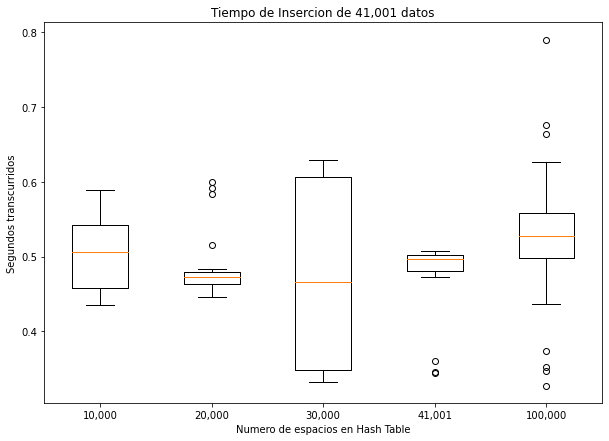

In [22]:
data = [tiempos_insercion_10mil, tiempos_insercion_20mil, tiempos_insercion_30mil, tiempos_insercion_exacto, tiempos_insercion_100mil]
etiquetas = ["10,000", "20,000", "30,000", "41,001","100,000"]
fig, ax = plt.subplots(figsize=(10,7))


plt.boxplot(data)
plt.ylabel('Segundos transcurridos')
plt.xlabel('Numero de espacios en Hash Table')
plt.title("Tiempo de Insercion de 41,001 datos")
ax.set_xticklabels(etiquetas)

plt.show()

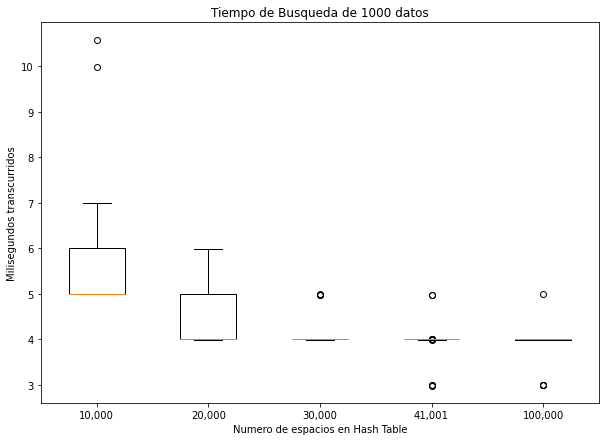

In [66]:
data = [tiempos_busqueda_10mil, tiempos_busqueda_20mil, tiempos_busqueda_30mil, tiempos_busqueda_40mil, tiempos_busqueda_100mil]
etiquetas = ["10,000", "20,000", "30,000", "41,001","100,000"]
fig, ax = plt.subplots(figsize=(10,7))


plt.boxplot(data)
plt.ylabel('Milisegundos transcurridos')
plt.xlabel('Numero de espacios en Hash Table')
plt.title("Tiempo de Busqueda de 1000 datos")
ax.set_xticklabels(etiquetas)

plt.show()

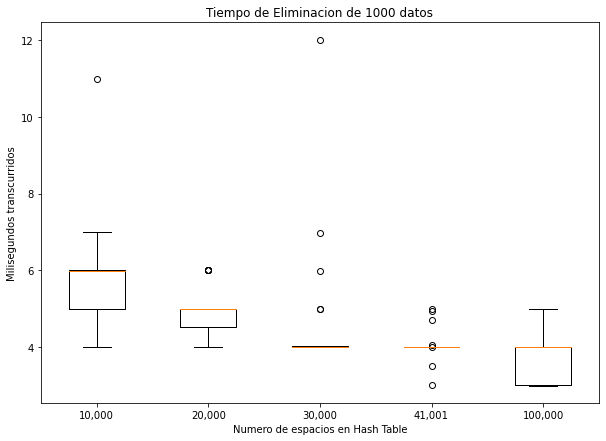

In [68]:
data = [tiempos_eliminacion_10mil, tiempos_eliminacion_20mil, tiempos_eliminacion_30mil, tiempos_eliminacion_40mil, tiempos_eliminacion_100mil]
etiquetas = ["10,000", "20,000", "30,000", "41,001","100,000"]
fig, ax = plt.subplots(figsize=(10,7))


plt.boxplot(data)
plt.ylabel('Milisegundos transcurridos')
plt.xlabel('Numero de espacios en Hash Table')
plt.title("Tiempo de Eliminacion de 1000 datos")
ax.set_xticklabels(etiquetas)

plt.show()